# WordCloud Map on UFO Sighting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import reverse_geocoder as rg

from wordcloud import WordCloud
from PIL import Image

In [2]:
ufo = pd.read_table("scrubbed.csv", sep = ",")

C:\Users\stefa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
ufo.shape

(80332, 11)

In [4]:
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


## Longitude and Latitude

In [5]:
df = ufo.copy()

In [6]:
df['latitude'] = df['latitude'].replace('q', '', regex = True)
df['latitude'] = df['latitude'].astype(float)

In [7]:
df['longitude'] = df['longitude '].astype(float)
df = df.drop(columns=['longitude '])

### Finding Regions

In [8]:
coordinates = list(zip(df['latitude'], df['longitude']))
location = rg.search(coordinates)
loc_df = pd.DataFrame(location)

Loading formatted geocoded file...


In [9]:
loc_df.head()

,lat,lon,name,admin1,admin2,cc
0,29.88327,-97.94139,San Marcos,Texas,Hays County,US
1,29.38663,-98.61797,Lackland Air Force Base,Texas,Bexar County,US
2,53.20832,-2.9253,Blacon,England,Cheshire West and Chester,GB
3,28.97859,-96.64609,Edna,Texas,Jackson County,US
4,21.40929,-157.80092,Kane'ohe,Hawaii,Honolulu County,US


In [10]:
df['Region'] = loc_df['admin1']

In [11]:
df['Region'].tail(3)

80329    California
80330      Virginia
80331      Oklahoma
Name: Region, dtype: object

## WorkCloud

In [12]:
regions = df['Region'].dropna().tolist()
regions_str = ' '.join(regions)

In [31]:
ufo_mask = np.array(Image.open('ufo2.jpg'))

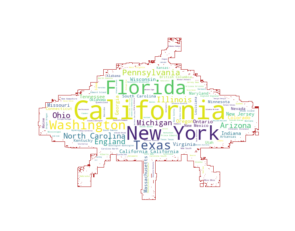

In [32]:
wordcloud = WordCloud(mask=ufo_mask, background_color='white', contour_width=1, contour_color='firebrick').generate(regions_str)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()